# Product Image Preprocessing

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage import transform, io

We will just do two simple things:
* make all image square --- pad short axis with 0
* resize to (128,128)

In [2]:
final_size = (128,128)

def make_square(image):
    h, w, c = image.shape[0], image.shape[1], 3
    if (h==w) and (len(image.shape)==3):
        return image[:,:,:3]
    
    size = int(max(h,w))
    new_image = np.zeros([size,size,c])
    h0 = int((size-h)/2)
    w0 = int((size-w)/2)
    if len(image.shape)<3:
        for i in range(3):
            new_image[h0:h0+h, w0:w0+w, i] = image
    else:
        new_image[h0:h0+h, w0:w0+w, :] = image[:,:,:3]
    new_image = new_image.astype(image.dtype)
    return new_image

def process_image(image, final_size):
    image_square = make_square(image)
    image_final = transform.resize(image_square, final_size)
    return image_final

#### read data

In [3]:
skin_care_df = pd.read_csv('../web_scraper/skin_care_products.csv')
body_care_df = pd.read_csv('../web_scraper/body_care_products.csv')
makeup_df = pd.read_csv('../web_scraper/makeup_products.csv')

if not os.path.isdir('images'):
    os.system("mkdir images")
if not os.path.isdir('skin_care'):
    os.system("mkdir images/skin_care")
if not os.path.isdir('body_care'):
    os.system("mkdir images/body_care")
if not os.path.isdir('makeup'):
    os.system("mkdir images/makeup")

#### check on a few images

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


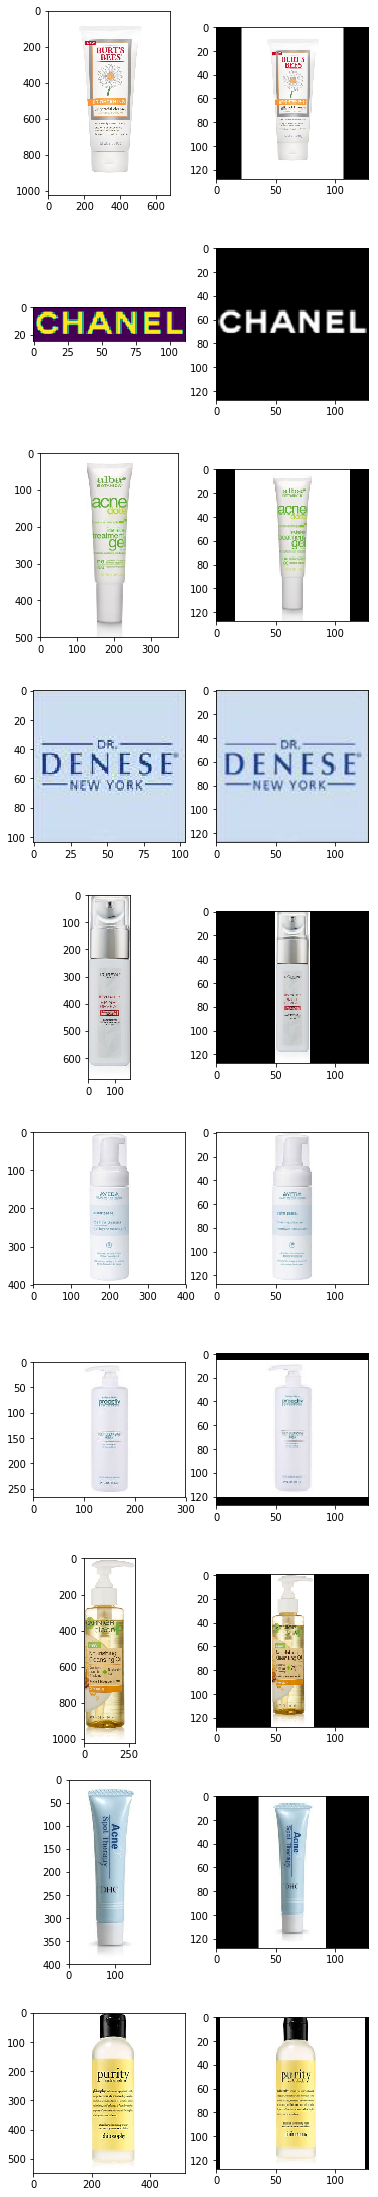

In [4]:
fig, ax = plt.subplots(10,2,figsize=(6,40))
for i, image_path in enumerate(skin_care_df['image_path'].sample(10).dropna().values):
    image = io.imread(os.path.join('../web_scraper',image_path))
    processed_image = process_image(image, final_size)
    ax[i,0].imshow(image)
    ax[i,1].imshow(processed_image) 
plt.show()

#### process all

In [5]:
for df in [skin_care_df, body_care_df, makeup_df]:
    for image_path in tqdm(df['image_path'].dropna().values):
        image = io.imread(os.path.join('../web_scraper',image_path))
        processed_image = process_image(image, final_size)
        io.imsave(image_path, processed_image)

  0%|          | 0/6017 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
  3%|▎         | 177/6017 [00:03<02:04, 46.96it/s]/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: 